# Import Tensorflow and other libraries

In [ ]:
#!pip install tensorflow
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2

In [ ]:
photos_path = os.path.join(os.getcwd(),'..','raw_data','photo')
sketches_path = os.path.join(os.getcwd(),'..','raw_data','sketch')

img1 = plt.imread(os.path.join(photos_path,'photo1','image0001.jpg'))
img2 = plt.imread(os.path.join(photos_path,'photo2', 'image0001.jpg'))
img3 = plt.imread(os.path.join(photos_path,'photo3','image0001.jpg'))

In [ ]:
def same_size(path):
    '''
    Evaluates whether a folder has all images with the same size or not
    1 ------> All of them have the same shape
    0 ------> There's at least one which doesn't have the same shape
    '''
    
    img_0 = plt.imread(os.path.join(path, sorted(os.listdir(path))[0]))
    for photo in sorted(os.listdir(path)):
        img_aux = plt.imread(os.path.join(path, photo))
        if img_0.shape != img_aux.shape:
            return 0 
    return 1

In [ ]:
photo1_path = os.path.join(photos_path,'photo1')
photo2_path = os.path.join(photos_path,'photo2')
photo3_path = os.path.join(photos_path,'photo3')

sketch1_path = os.path.join(sketches_path,'sketch1')
sketch2_path = os.path.join(sketches_path,'sketch2')
sketch3_path = os.path.join(sketches_path,'sketch3')

In [ ]:
sketch1_path, sketch2_path, sketch3_path

In [ ]:
same_size(photo1_path)

In [ ]:
same_size(photo2_path)

In [ ]:
same_size(photo3_path)

In [ ]:
diff_photos = []
for photo in sorted(os.listdir(photo2_path)):
    img = plt.imread(os.path.join(photo2_path, photo))
    if img.shape != (318, 223, 3):
        diff_photos.append(photo)

print(diff_photos)

In [ ]:
os.listdir(sketch2_path)

In [ ]:
for photo in sorted(os.listdir(sketch2_path)):
    img = plt.imread(os.path.join(sketch2_path, photo))
    img = cv2.resize(img, [256, 256])
    result=cv2.imwrite(os.path.join(os.getcwd(), '..', 'preproc_sketch', 'sketch2_preproc', f'{photo.strip(".png")}'+'.jpg'), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    if result==True:
        print('File saved successfully')
    else:
        print('Error in saving file')

In [ ]:
photo = os.listdir(photo2_path)[0]

img = plt.imread(os.path.join(photo2_path, photo))
img = cv2.resize(img, [256, 256])
result=cv2.imwrite(os.path.join(os.getcwd(), '..', 'preproc_data'), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [ ]:
result

In [ ]:
os.getcwd()

## Normalization des données

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

photo_path = os.path.join(os.getcwd(), '..', 'preproc_data','preproc_photo', 'photo1_preproc')
sketch_path = os.path.join(os.getcwd(), '..', 'preproc_data', 'preproc_sketch', 'sketch1_preproc')

photo = plt.imread(os.path.join(photo_path,'image0001.jpg'))
sketch = plt.imread(os.path.join(sketch_path,'sketch0001.jpg'))

2022-11-30 15:11:09.692172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 15:11:11.256212: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 15:11:11.256305: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-30 15:11:11.520590: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-30 15:11:15.508725: W tensorflow/stream_executor/platform/de

In [ ]:
def normalize(img, max = 255):
    return img/max

plt.imshow(normalize(photo))

**Listing the photos with their corresponding sketches**

**Train-test split**

### Local

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.cloud import storage
import tensorflow as tf

photo1_path = os.path.join(os.getcwd(),'..','preproc_data','preproc_photo', 'photo1_preproc')
sketch1_path = os.path.join(os.getcwd(),'..','preproc_data','preproc_sketch', 'sketch1_preproc')

2022-11-30 15:51:10.123117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 15:51:11.135721: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 15:51:11.135750: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-30 15:51:11.245361: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-30 15:51:14.568018: W tensorflow/stream_executor/platform/de

In [38]:
def photo_sketch_join_local(photos_path: str, sketches_path:str):
    '''
    Creates a DataFrame containing every pair photo-sketch
    Shape: (number of pairs, 2)
    '''
    
    # We sort the names of the photos and sketches
    photo_list = sorted(os.listdir(photos_path))
    sketch_list = sorted(os.listdir(sketches_path))
    
    photo_sketch_dict = dict(photo=photo_list, sketch=sketch_list)
    
    return pd.DataFrame(photo_sketch_dict)



In [40]:
def normalize(image, max = 255):
    '''
    Applies a MinMax scaling to the data
    '''
    return image/max

In [41]:
def photo_sketch_load(photos_path: str, sketches_path:str):
    '''
    Reads the np.arrays for the photos and sketches and
    loads it into a DataFrame
    '''
    df = photo_sketch_join_local(photos_path, sketches_path)
    
    photo_arrays = []
    sketch_arrays = []
    
    for photo in df.photo:
        # Para probar voy a meter photo1 pero luego hay que borrarlo
        photo_array = plt.imread(os.path.join(photos_path, photo))
        _shape = [1]+list(photo_array.shape)
        photo_arrays.append(normalize(photo_array.reshape(_shape)))
        
    for sketch in df.sketch:
        sketch_array = plt.imread(os.path.join(sketches_path, sketch))
        _shape = [1]+list(sketch_array.shape)
        sketch_arrays.append(normalize(sketch_array.reshape(_shape)))
        
    return np.vstack(photo_arrays),np.vstack(sketch_arrays)
    

In [7]:
photo_data, sketch_data = photo_sketch_load(photo1_path, sketch1_path)

: 

: 

In [ ]:
def train_test_data(data_dict: pd.DataFrame, train_size = 0.75):
    
    data_train = pd.DataFrame(data_dict).sample(frac = train_size).sort_index().reset_index()
    data_test = pd.DataFrame(data_dict).drop(data_train.index).sort_index().reset_index()

    photos_train = data_train.photo
    sketches_train = data_train.sketch
    photos_test = data_test.photo
    sketches_test = data_test.sketch
    
    return photos_train, sketches_train, photos_test, sketches_test

In [ ]:
photo1_path = os.path.join(os.getcwd(),'..','preproc_data','preproc_photo', 'photo1_preproc')
sketch1_path = os.path.join(os.getcwd(),'..','preproc_data','preproc_sketch', 'sketch1_preproc')


#prueba = photo_sketch_load(photo1_path, sketch1_path)

In [ ]:
photos_train, sketches_train, photos_test, sketches_test = train_test_data(prueba)

In [ ]:
photos_train.size+photos_test.size

In [ ]:
train_size = 0.75
data_train = pd.DataFrame(prueba).sample(frac = train_size).sort_index().reset_index()
data_test = pd.DataFrame(prueba).drop(data_train.index).sort_index().reset_index()

photos_train = data_train.photo
sketches_train = data_train.sketch
photos_test = data_test.photo
sketches_test = data_test.sketch


In [ ]:
plt.imshow(photos_train[122])

In [ ]:
plt.imshow(sketches_train[122])

In [ ]:
def load_FF2F_data(photos_path, sketches_path, train_size = 0.75):
    #Rename
    data = photo_sketch_load(photos_path, sketches_path)
    data_train = pd.DataFrame(data).sample(frac = train_size).sort_index().reset_index()
    data_test = pd.DataFrame(data).drop(data_train.index).sort_index().reset_index()

    photos_train = data_train.photo
    sketches_train = data_train.sketch
    photos_test = data_test.photo
    sketches_test = data_test.sketch    
    return photos_train, sketches_train, photos_test, sketches_test
    

In [ ]:
photos_train, sketches_train, photos_test, sketches_test =load_FF2F_data(photo1_path, sketch1_path)

In [ ]:
photos_train.size+photos_test.size
plt.imshow(photos_train[0])

In [ ]:
plt.imshow(photos_test[0])

In [ ]:
import numpy as np
np.array(photos_train).

In [ ]:
###################################################

### Cloud

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.cloud import storage
import tensorflow as tf

In [5]:
def photo_sketch_join_cloud():
    storage_client = storage.Client('ff2s-370015')
        
    photo_list = sorted(tf.data.Dataset.list_files('gs://ff2s/preproc_data/photo1*/*.jpg'))
    sketch_list = sorted(tf.data.Dataset.list_files('gs://ff2s/preproc_data/sketch1*/*.jpg'))
    
    photo_sketch_dict = dict(photo=photo_list, sketch=sketch_list)
    
    return pd.DataFrame(photo_sketch_dict)

In [6]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img)
    return img

In [43]:
storage_client = storage.Client('ff2s-370015')
photo_path = tf.data.Dataset.list_files('gs://ff2s/preproc_data/photo1*/*.jpg',shuffle=None)
sketch_path = tf.data.Dataset.list_files('gs://ff2s/preproc_sketch/sketch1*/*.jpg',shuffle=None)

In [25]:
algo = []
for i in photo_path:
    photo = load_image(i)
    break
    #sketch = load_image(j)
    #plt.imshow(photo.numpy())
    #plt.show()
    #plt.imshow(sketch.numpy())
    #plt.show()
photo
    

<tf.Tensor: shape=(256, 256, 3), dtype=uint8, numpy=
array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[213, 180, 163],
        [213, 181, 160],
        [212, 182, 154],
        ...,
        [214, 183, 163],
        [213, 182, 162],
        [212, 181, 161]],

       [[212, 179, 160],
        [212, 180, 159],
        [211, 181, 153],
        ...,
        [215, 184, 163],
        [214, 183, 163],
        [212, 181, 161]],

       [[212, 179, 160],
        [212, 180, 159],
        [211, 181, 153],
        ...,
        [215, 184, 16

2022-11-30 17:08:31.199463: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at strided_slice_op.cc:105 : INVALID_ARGUMENT: Index out of range using input dim 0; input has only 0 dims


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} Index out of range using input dim 0; input has only 0 dims [Op:StridedSlice] name: strided_slice/

In [14]:
photo_path

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [37]:
for image in photo_path:
    print(image.numpy())

b'gs://ff2s/preproc_data/photo2_preproc/image0057.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0077.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0081.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0020.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0002.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0016.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0063.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0082.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0053.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0044.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0065.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0032.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0079.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0080.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0068.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0085.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0028.jpg'
b'gs://ff2s/preproc_data/photo2_preproc/image0026.jpg'
b'gs://ff2

In [40]:
from tensorflow.keras.utils import image_dataset_from_directory

In [5]:
!gsutil -m cp -r gs://ff2s/preproc_data/photo1_preproc/ ../preproc_data
!gsutil -m cp -r gs://ff2s/preproc_data/photo3_preproc/ ../preproc_data
!gsutil -m cp -r gs://ff2s/preproc_sketch/sketch1_preproc/ ../preproc_data
!gsutil -m cp -r gs://ff2s/preproc_sketch/sketch3_preproc/ ../preproc_data

If you experience problems with multiprocessing on MacOS, they might be related to https://bugs.python.org/issue33725. You can disable multiprocessing by editing your .boto config or by adding the following flag to your command: `-o "GSUtil:parallel_process_count=1"`. Note that multithreading is still available even if you disable multiprocessing.

Copying gs://ff2s/preproc_data/photo1_preproc/image0001.jpg...
Copying gs://ff2s/preproc_data/photo1_preproc/image0002.jpg...
Copying gs://ff2s/preproc_data/photo1_preproc/image0003.jpg...                  
Copying gs://ff2s/preproc_data/photo1_preproc/image0004.jpg...
Copying gs://ff2s/preproc_data/photo1_preproc/image0005.jpg...                  
Copying gs://ff2s/preproc_data/photo1_preproc/image0007.jpg...                  
Copying gs://ff2s/preproc_data/photo1_preproc/image0006.jpg...
Copying gs://ff2s/preproc_data/photo1_preproc/image0009.jpg...
Copying gs://ff2s/preproc_data/photo1_preproc/image0008.jpg...
Copying gs://ff2s/preproc_da

In [90]:
photos = image_dataset_from_directory('../preproc_data/',labels = None, shuffle=None,batch_size=1529)
sketches = image_dataset_from_directory('../preproc_sketch/',labels = None, shuffle=None,batch_size=1529)

Found 1529 files belonging to 1 classes.
Found 1529 files belonging to 1 classes.


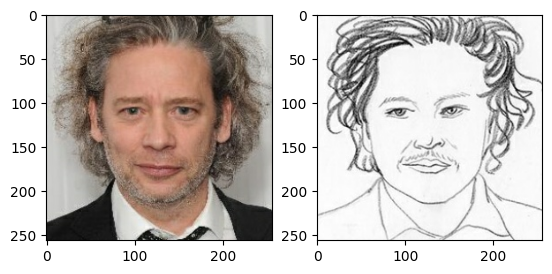

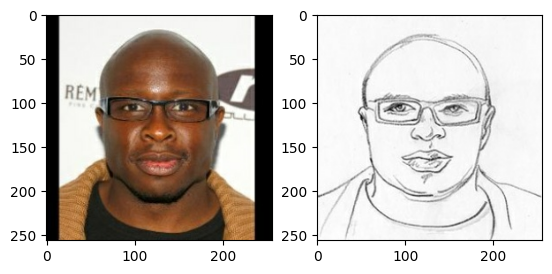

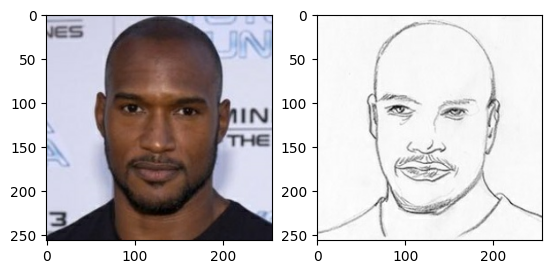

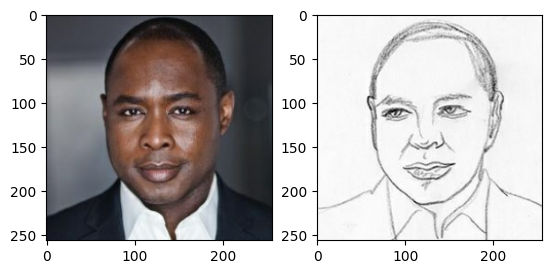

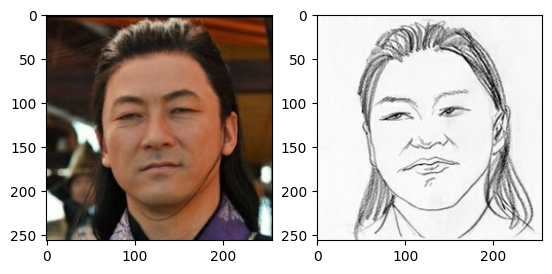

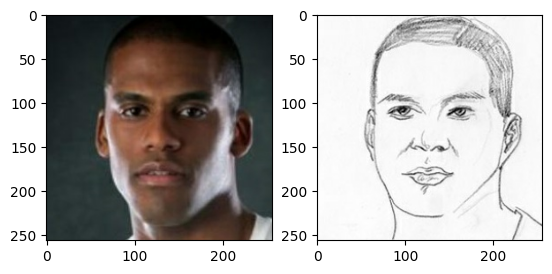

In [92]:
for photo in range(10,16):
    fig, axs=plt.subplots(1,2)
    axs[0].imshow(next(iter(photos))[photo].numpy()/255)
    axs[1].imshow(next(iter(sketches))[photo].numpy()/255)
    

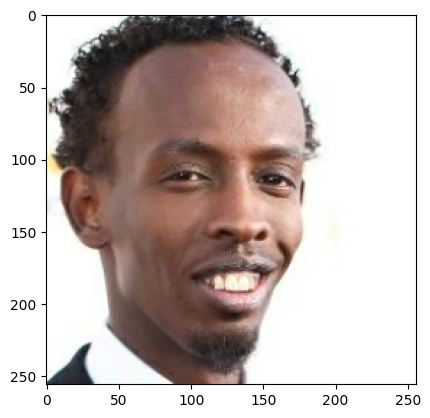

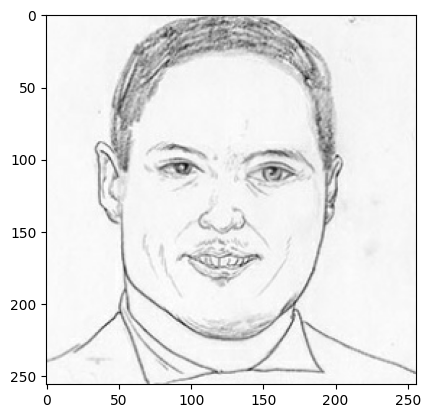

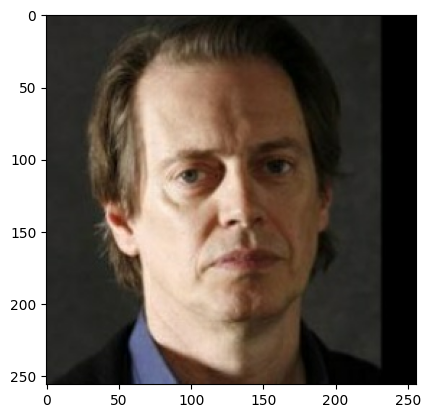

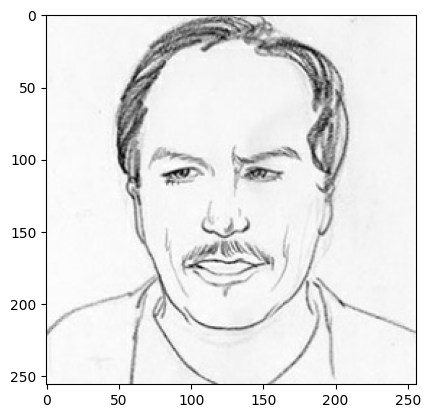

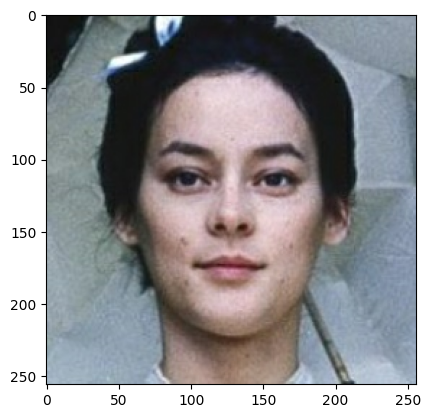

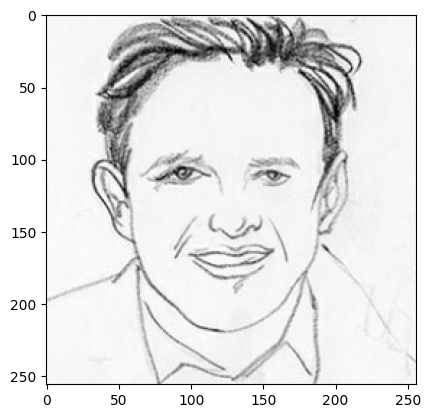

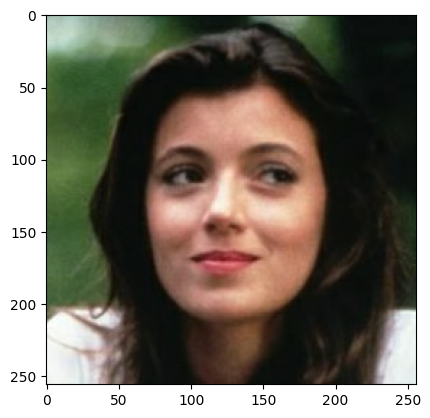

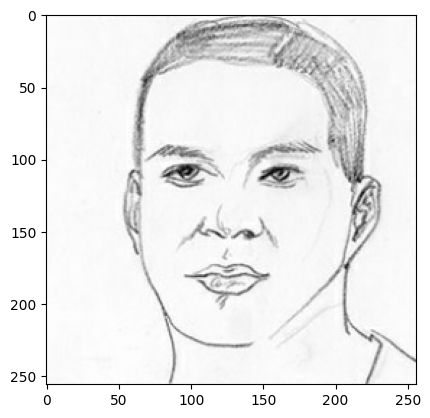

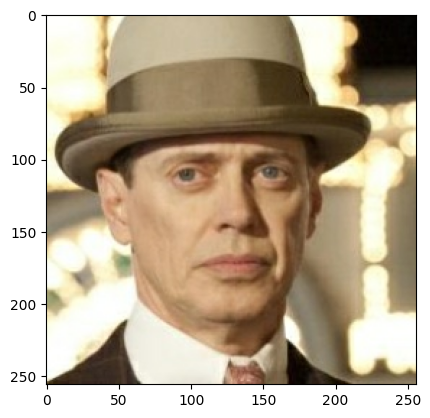

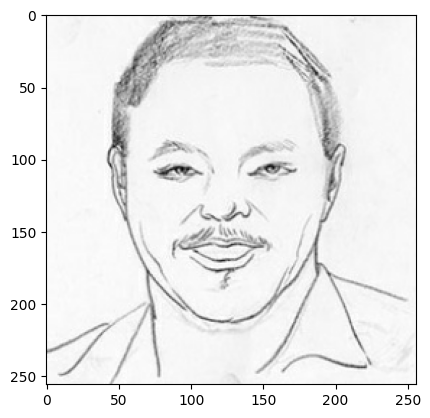

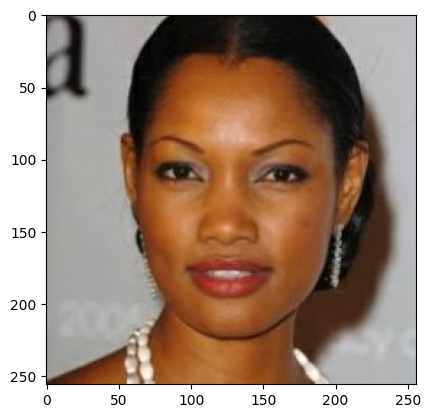

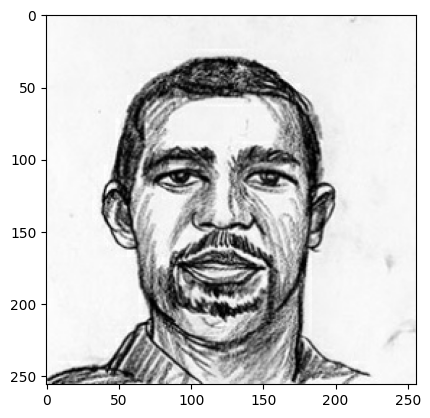

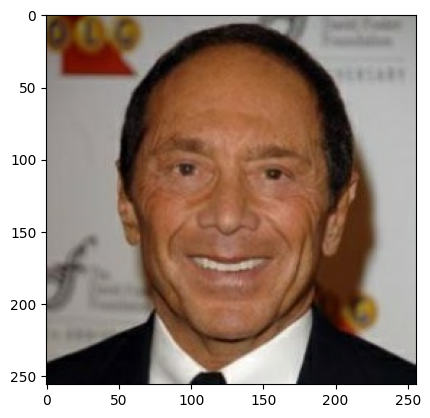

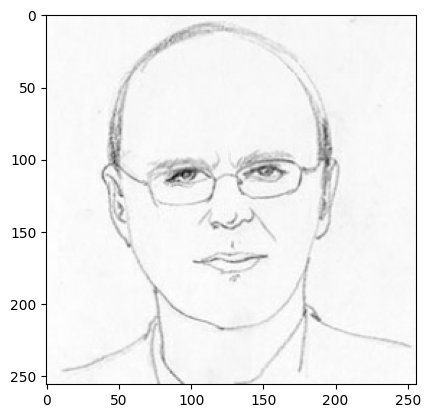

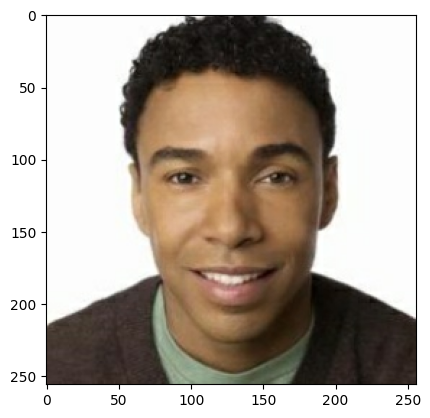

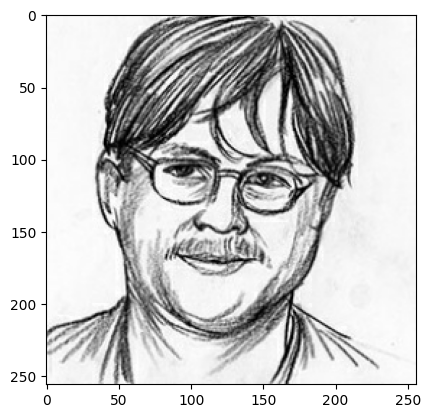

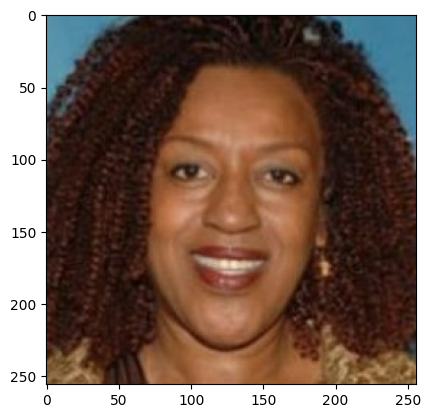

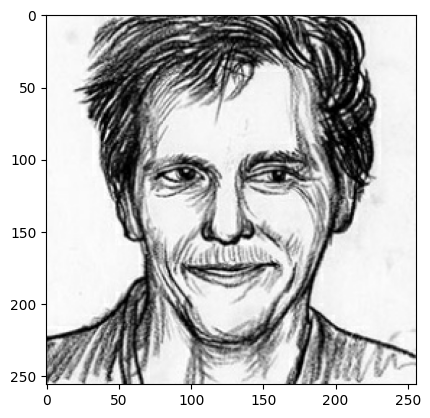

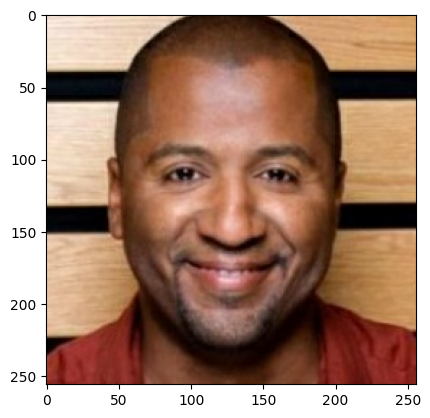

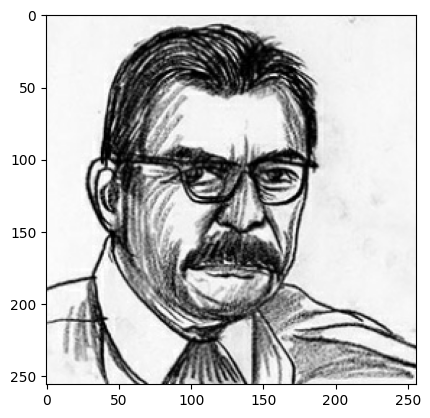

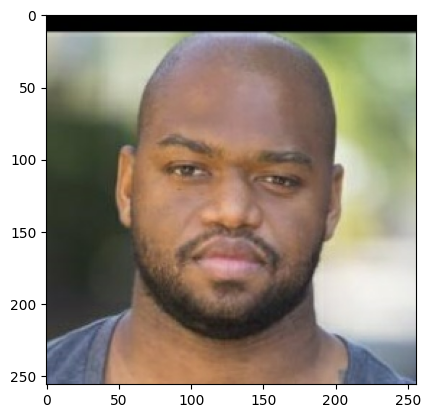

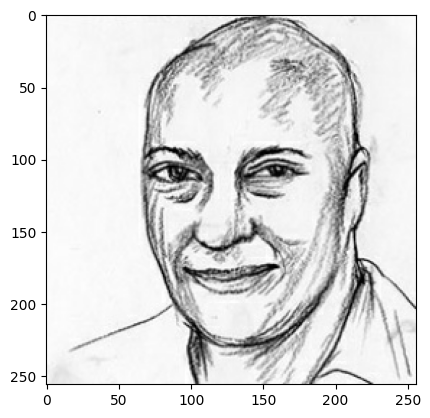

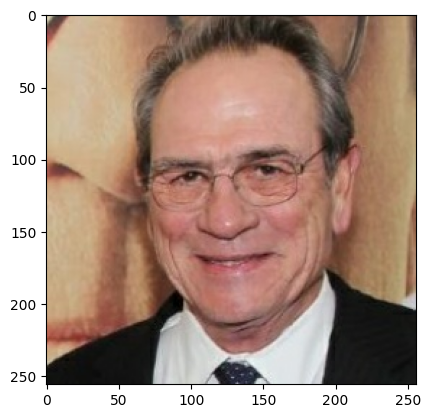

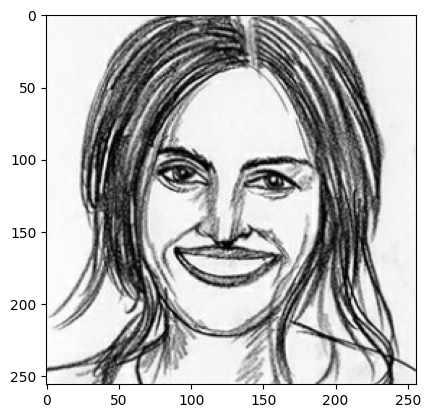

KeyboardInterrupt: 

In [44]:

photo_name = []
sketch_names = []
for i, j in zip(photo_path, sketch_path):
    photo_name.append(i)
    photo = load_image(i)
    sketch_names.append(j)
    sketch = load_image(j)
    plt.imshow(photo.numpy())
    plt.show()
    plt.imshow(sketch.numpy())
    plt.show()
    

In [70]:
photo_name[:5], sketch_names[:5]


([6790, 6792, 6794, 6796, 6798], [6791, 6793, 6795, 6797, 6799])

In [28]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img)
    return img

In [30]:
ds_img = ds_img.map(load_image)

NameError: name 'ds_img' is not defined

In [31]:
plt.imshow(next(iter(ds_img.take(1))).numpy())

NameError: name 'ds_img' is not defined